In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.LoanAmount[0:]

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.shape

(614, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

as loan_id column has no that much importance and also it does not depends on target variable so lets will drop it

In [7]:
data.drop(['Loan_ID'],axis=1,inplace=True)

there are some missing values in some columns will fill thet values

In [8]:
#fill the null values in respective columns
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [9]:
data.isnull().mean()

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# DATA ENCODING

lets will do some data encoding of catogorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
label=le.fit_transform(data["Gender"])
label
le.classes_
data=data.drop("Gender",axis='columns')
data["Gender"]=label
data

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender
0,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [12]:
le=LabelEncoder()
label=le.fit_transform(data["Married"])
label
le.classes_
data=data.drop("Married",axis='columns')
data["Married"]=label


In [13]:
le=LabelEncoder()
label=le.fit_transform(data["Education"])
label
le.classes_
data=data.drop("Education",axis='columns')
data["Education"]=label


In [14]:
le=LabelEncoder()
label=le.fit_transform(data["Self_Employed"])
label
le.classes_
data=data.drop("Self_Employed",axis='columns')
data["Self_Employed"]=label


In [15]:
le=LabelEncoder()
label=le.fit_transform(data["Property_Area"])
label
le.classes_
data=data.drop("Property_Area",axis='columns')
data["Property_Area"]=label


In [16]:
le=LabelEncoder()
label=le.fit_transform(data["Loan_Status"])
label
le.classes_
data=data.drop("Loan_Status",axis='columns')
data["Loan_Status"]=label
data


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,2,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,2,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,2,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,1
610,3+,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,2,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,2,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Gender             614 non-null    int32  
 7   Married            614 non-null    int32  
 8   Education          614 non-null    int32  
 9   Self_Employed      614 non-null    int32  
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [18]:
le=LabelEncoder()
label=le.fit_transform(data["Dependents"])
label
le.classes_
data=data.drop("Dependents",axis='columns')
data["Dependents"]=label
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,2,1,0
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,1
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,2,1,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,2,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,1,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1,3
611,8072,240.0,253.0,360.0,1.0,1,1,0,0,2,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,2,1,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Gender             614 non-null    int32  
 6   Married            614 non-null    int32  
 7   Education          614 non-null    int32  
 8   Self_Employed      614 non-null    int32  
 9   Property_Area      614 non-null    int32  
 10  Loan_Status        614 non-null    int32  
 11  Dependents         614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [20]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.218241,0.133550,1.037459,0.687296,0.744300
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.413389,0.340446,0.787482,0.463973,1.009623
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Gender             614 non-null    int32  
 6   Married            614 non-null    int32  
 7   Education          614 non-null    int32  
 8   Self_Employed      614 non-null    int32  
 9   Property_Area      614 non-null    int32  
 10  Loan_Status        614 non-null    int32  
 11  Dependents         614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [22]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.817590,0.653094,0.218241,0.133550,1.037459,0.687296,0.744300
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.386497,0.476373,0.413389,0.340446,0.787482,0.463973,1.009623
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000


In [23]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,0.127180,-0.009500,-0.004710,0.118202
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,-0.062290,-0.016100,0.010522,-0.059187,0.030430
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,0.115100,-0.046632,-0.033214,0.163103
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,-0.033739,-0.076120,-0.022549,-0.103864
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,-0.001550,0.001963,0.540556,-0.040160
Gender,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.000525,-0.025752,0.017987,0.172914
Married,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.004489,0.004257,0.091478,0.334216
Education,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.010383,-0.065243,-0.085884,0.055752
Self_Employed,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.000525,0.004489,-0.010383,1.000000,-0.030860,-0.003700,0.056798
Property_Area,-0.009500,0.010522,-0.046632,-0.076120,0.001963,-0.025752,0.004257,-0.065243,-0.030860,1.000000,0.032112,-0.000244


In [24]:
data.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
Dependents           0
dtype: int64

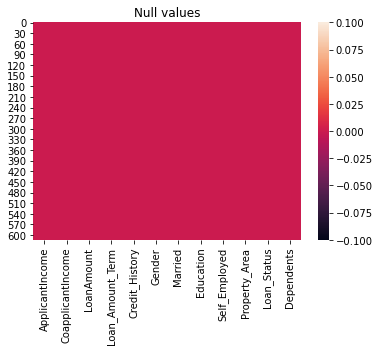

In [25]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

there is no NULL values present now

<AxesSubplot:>

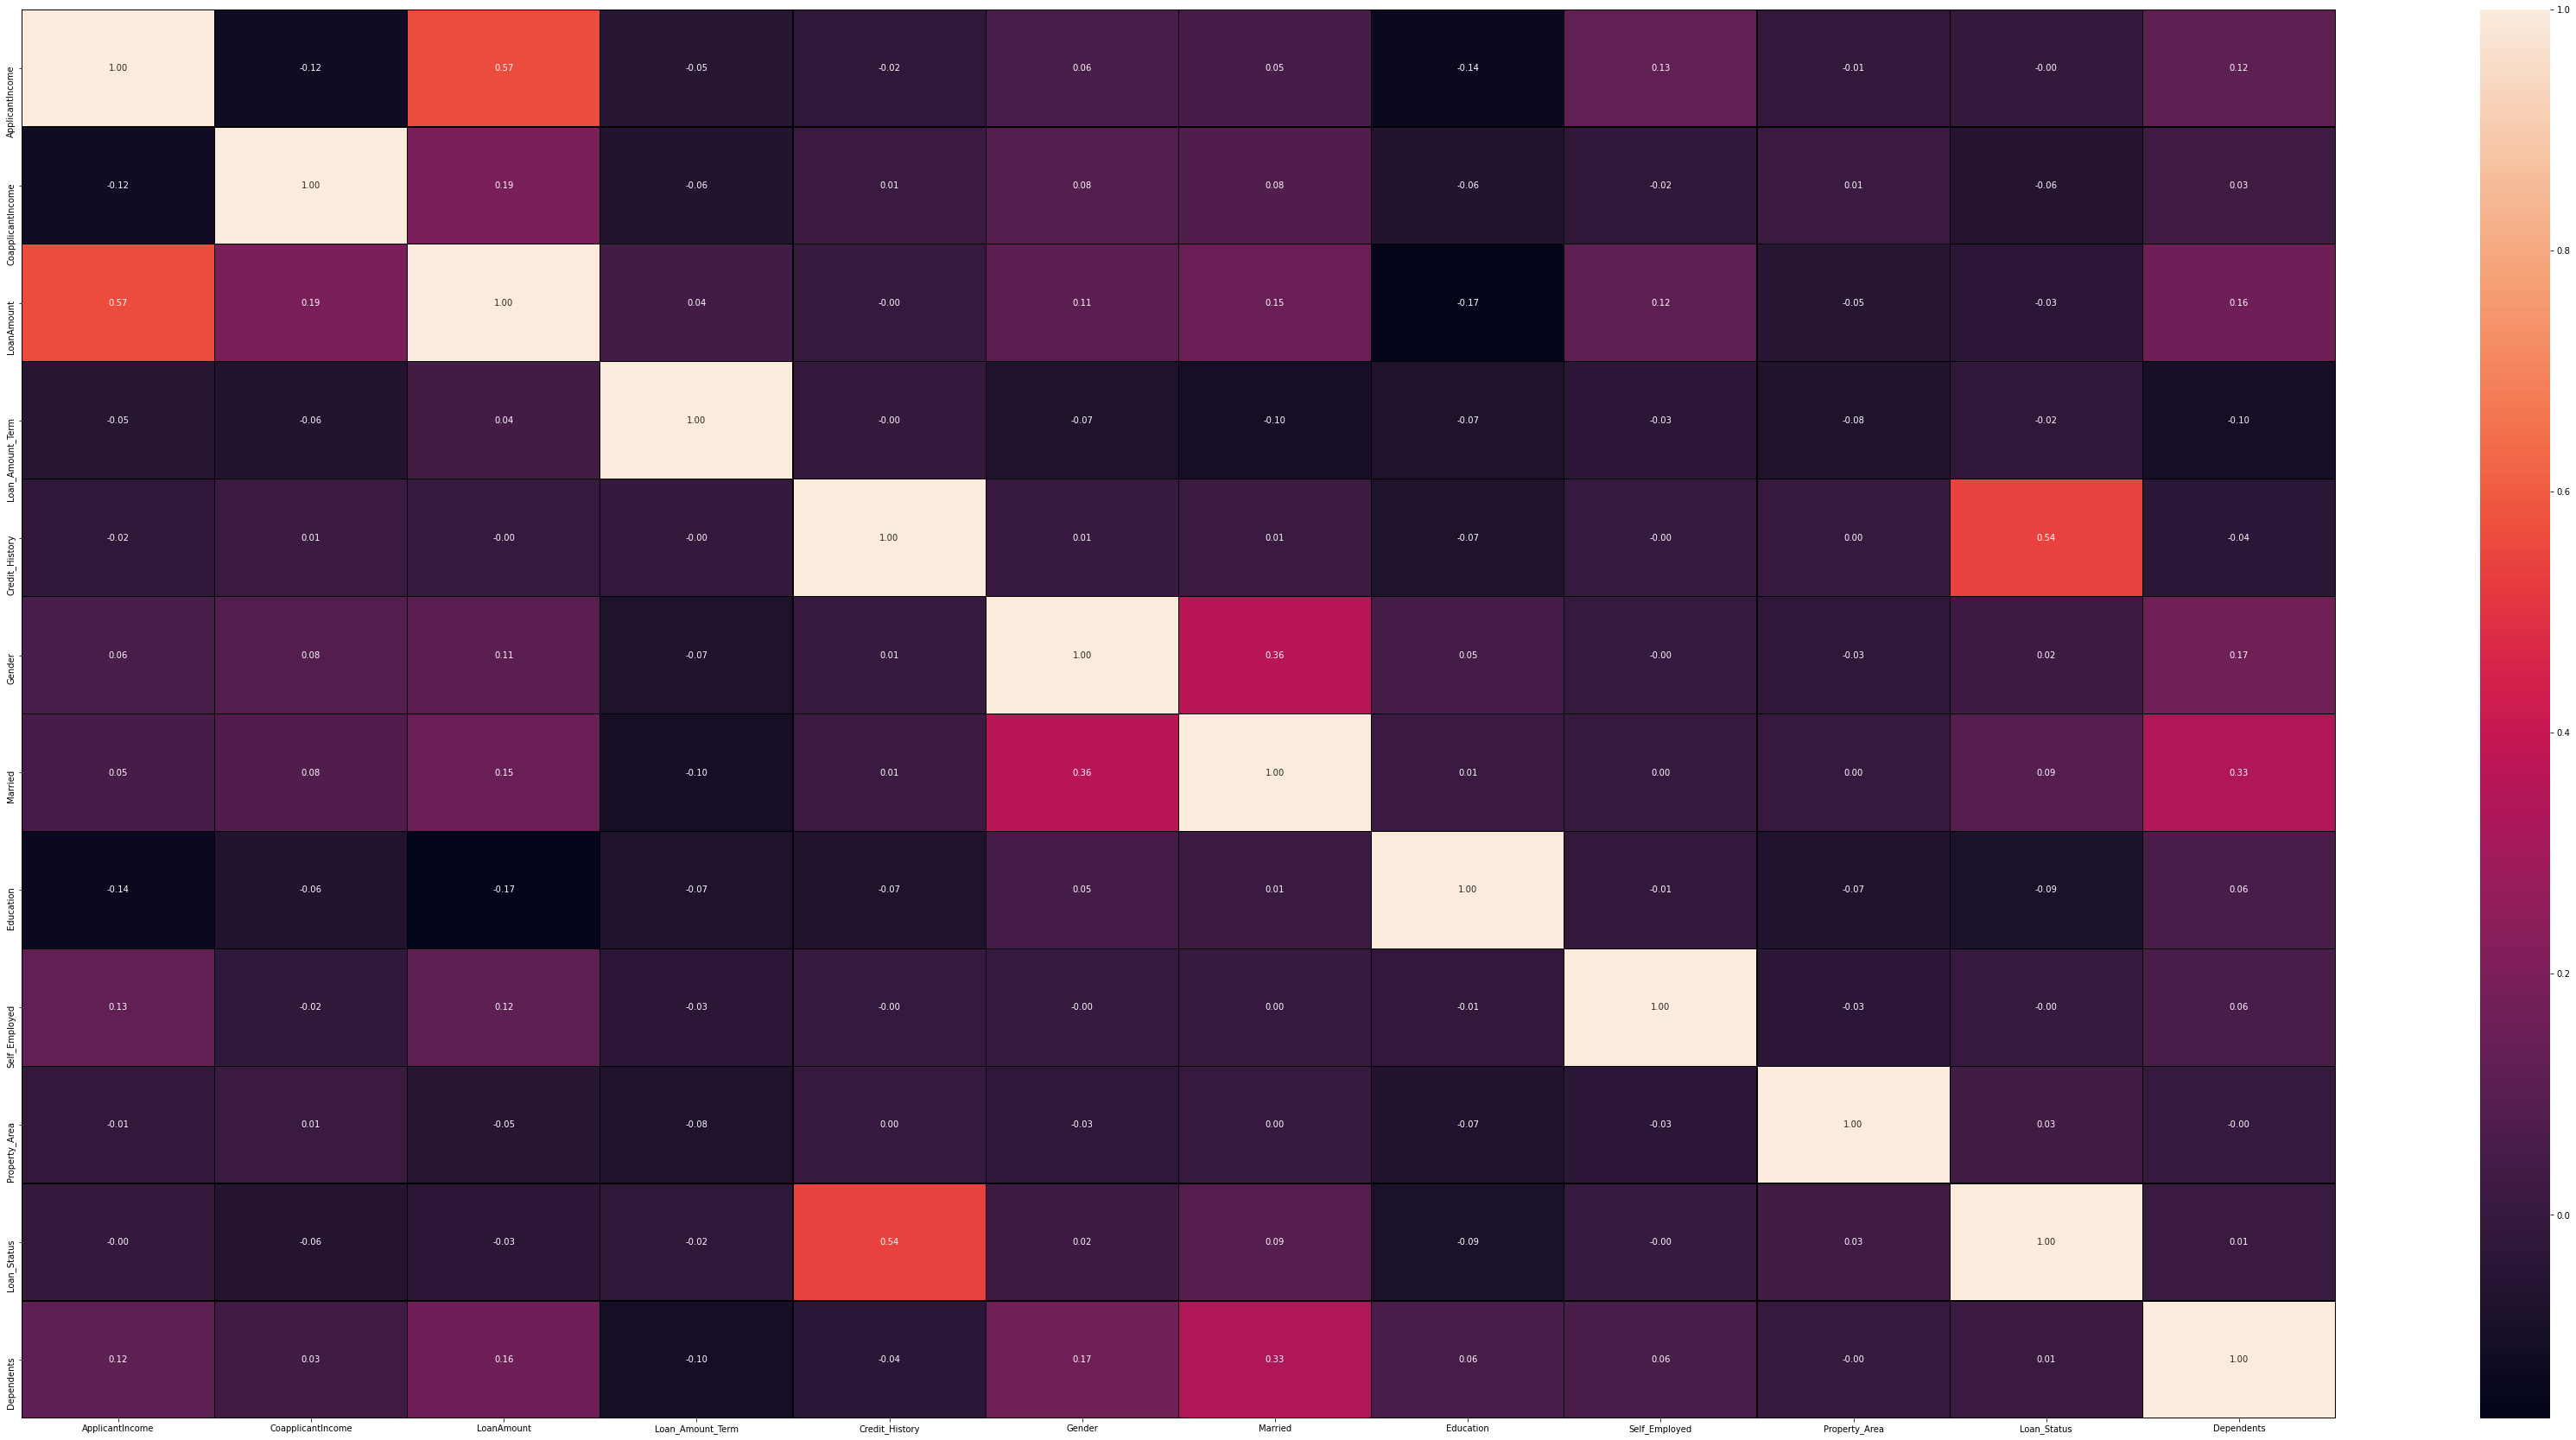

In [26]:
#heat map
plt.figure(figsize=(60,30))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

it show the correlation of each feature with its own and target variable

ApplicantIncome          AxesSubplot(0.125,0.71587;0.227941x0.16413)
CoapplicantIncome     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
LoanAmount            AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.518913;0.227941x0.16413)
Credit_History       AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Gender               AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Married                 AxesSubplot(0.125,0.321957;0.227941x0.16413)
Education            AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Self_Employed        AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Property_Area              AxesSubplot(0.125,0.125;0.227941x0.16413)
Loan_Status             AxesSubplot(0.398529,0.125;0.227941x0.16413)
Dependents              AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

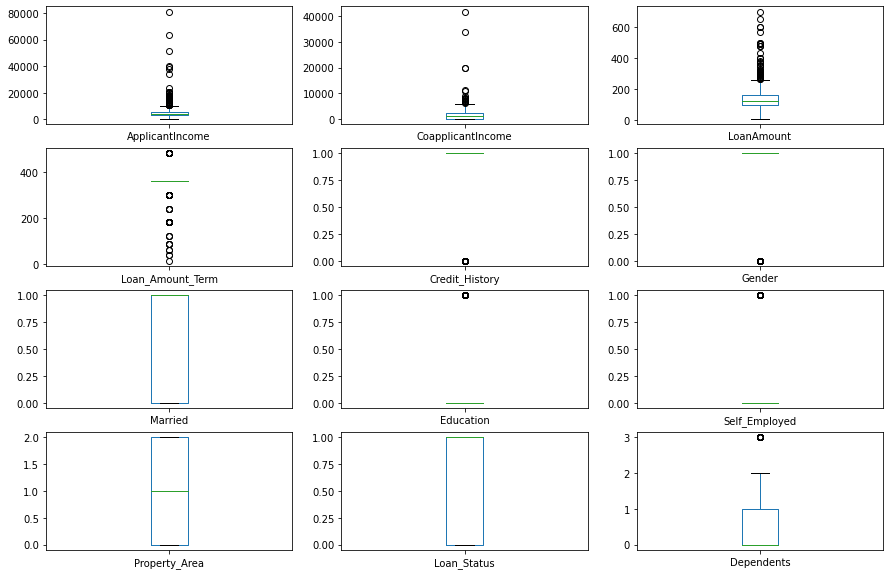

In [27]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(4,3),figsize = (15,10))

box plot shows outliers are present in applicantincome,coapplicantincome and loanamount

In [28]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[0.07299082 0.55448733 0.21124125 ... 1.22329839 0.67451931 0.73780632]
 [0.13441195 0.03873155 0.21124125 ... 1.31851281 1.48253724 0.25346957]
 [0.39374734 0.55448733 0.94899647 ... 1.22329839 0.67451931 0.73780632]
 ...
 [0.43717437 0.47240418 1.27616847 ... 1.22329839 0.67451931 0.25346957]
 [0.35706382 0.55448733 0.49081614 ... 1.22329839 0.67451931 1.24474546]
 [0.13441195 0.55448733 0.15174486 ... 0.04760721 1.48253724 0.73780632]]


In [29]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(614, 12)


In [30]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [31]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(614, 12)
(577, 12)
Shape after removing outlires (577, 12)


ApplicantIncome          AxesSubplot(0.125,0.71587;0.227941x0.16413)
CoapplicantIncome     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
LoanAmount            AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Loan_Amount_Term        AxesSubplot(0.125,0.518913;0.227941x0.16413)
Credit_History       AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Gender               AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Married                 AxesSubplot(0.125,0.321957;0.227941x0.16413)
Education            AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Self_Employed        AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Property_Area              AxesSubplot(0.125,0.125;0.227941x0.16413)
Loan_Status             AxesSubplot(0.398529,0.125;0.227941x0.16413)
Dependents              AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

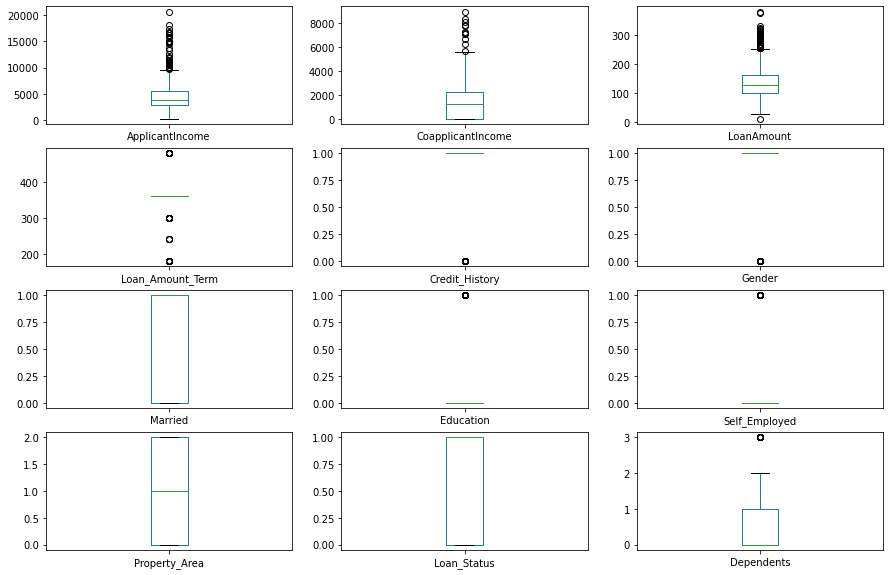

In [32]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(4,3),figsize = (15,10))

In [33]:
data.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
Property_Area       -0.055332
Loan_Status         -0.822635
Dependents           1.052106
dtype: float64

now will remove the skewness from countinuous data type below

In [34]:
#remove skewness
data['LoanAmount']=np.sqrt(data['LoanAmount'])
data['ApplicantIncome']=np.sqrt(data['ApplicantIncome'])
data['CoapplicantIncome']=np.sqrt(data['CoapplicantIncome'])


In [35]:
data.skew()

ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
Property_Area       -0.055332
Loan_Status         -0.822635
Dependents           1.052106
dtype: float64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>],
       [<AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>,
        <AxesSubplot:title={'center':'Dependents'}>]], dtype=object)

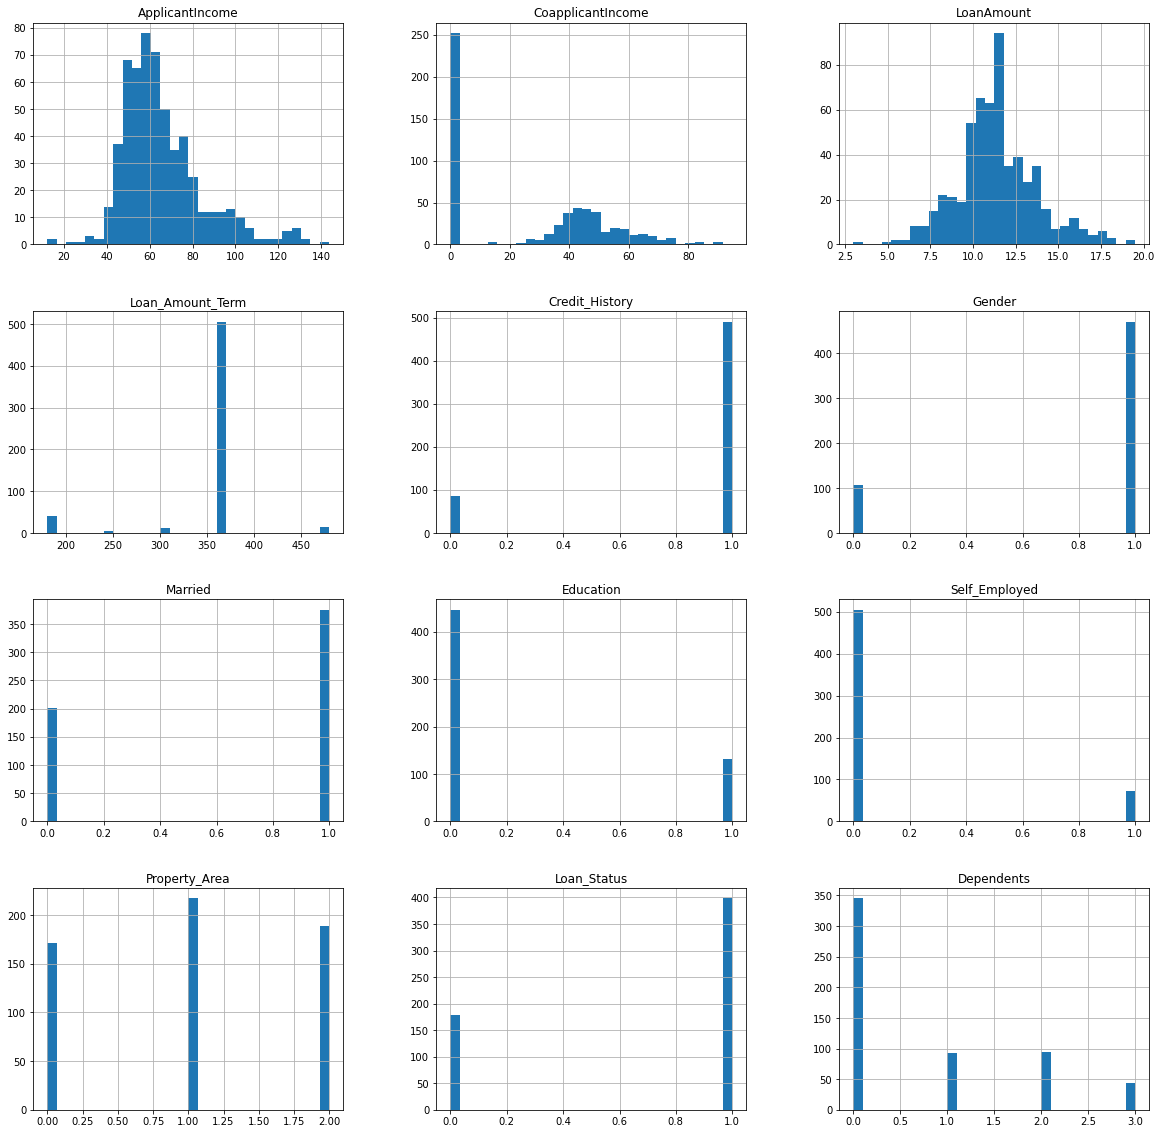

In [36]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (4,3), bins = 30)

lets will plot scatter plot

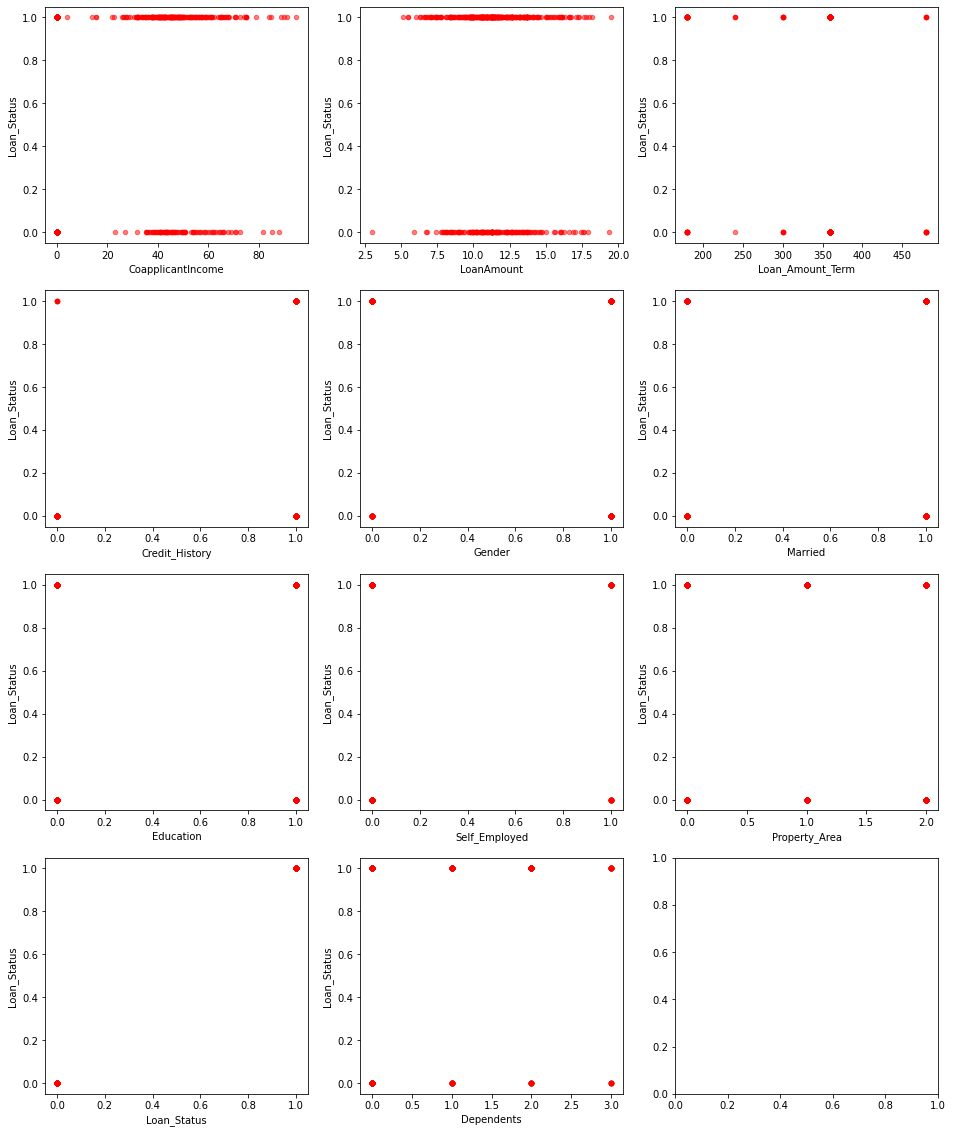

In [37]:
# setup figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='Loan_Status', ax=ax, alpha=0.5, color='r')


In [38]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['Loan_Status'])
y = data[["Loan_Status"]]
print(x.shape)
print(y.shape)

(577, 11)
(577, 1)


In [39]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.57381502, -1.04837932, -0.03483236, ..., -0.38058018,
         1.22747207, -0.72331271],
       [ 0.10853918,  0.44424163, -0.03483236, ..., -0.38058018,
        -1.30652215,  0.2823534 ],
       [-0.57635331, -1.04837932, -1.39580841, ...,  2.62756724,
         1.22747207, -0.72331271],
       ...,
       [ 1.28201937, -0.45291673,  1.92460633, ..., -0.38058018,
         1.22747207,  0.2823534 ],
       [ 1.13556851, -1.04837932,  0.97260138, ..., -0.38058018,
         1.22747207,  1.28801951],
       [ 0.10853918, -1.04837932,  0.05854883, ...,  2.62756724,
        -0.03952504, -0.72331271]])

# Building Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("bestbaccuracy is",maxAccu,"on random state",maxRS)        

bestbaccuracy is 0.8848920863309353 on random state 39


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=maxRS)

In [45]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
preddt=log_reg.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8848920863309353
[[24 16]
 [ 0 99]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        40
           1       0.86      1.00      0.93        99

    accuracy                           0.88       139
   macro avg       0.93      0.80      0.84       139
weighted avg       0.90      0.88      0.87       139



In [46]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7553956834532374
[[29 11]
 [23 76]]
              precision    recall  f1-score   support

           0       0.56      0.72      0.63        40
           1       0.87      0.77      0.82        99

    accuracy                           0.76       139
   macro avg       0.72      0.75      0.72       139
weighted avg       0.78      0.76      0.76       139



In [47]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8561151079136691
[[24 16]
 [ 4 95]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        40
           1       0.86      0.96      0.90        99

    accuracy                           0.86       139
   macro avg       0.86      0.78      0.81       139
weighted avg       0.86      0.86      0.85       139



In [48]:
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
preddt=kn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8705035971223022
[[25 15]
 [ 3 96]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.74        40
           1       0.86      0.97      0.91        99

    accuracy                           0.87       139
   macro avg       0.88      0.80      0.82       139
weighted avg       0.87      0.87      0.86       139



outoff above models we are getting highest accuracy for logistic regression 0.88

# AUC-ROC curve

In [49]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

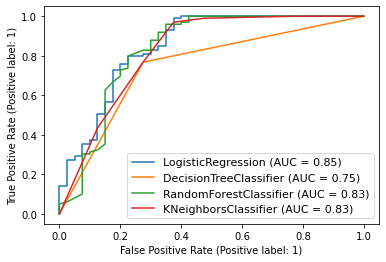

In [50]:
disp=plot_roc_curve(log_reg,x_test,y_test)
disp=plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
disp=plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

LogisticRegression is the best fit model based on the accuracy

In [51]:
log_regression=LogisticRegression()
log_regression.fit(x_train,y_train)

LogisticRegression()

Saving the model: The model is ready & we have saved the model in ‘pkl’

In [52]:
import pickle

In [53]:
with open ('model_loanapplication.say','wb')as f:
    pickle.dump(log_regression,f)
with open ('standardscalar.sav','wb')as f:
    pickle.dump(scalar,f)    

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
y_pred=log_regression.predict(x_test)

In [56]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8848920863309353